In [13]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

import warnings
warnings.filterwarnings('ignore')

In [11]:

df = pd.read_csv('./assets/data/censo_estadual_2007_a_2022.csv', encoding='latin-1', sep=',', low_memory=False)
df.drop(columns='Unnamed: 0', inplace=True)
df['NU_ANO_CENSO'] = pd.to_datetime(df['NU_ANO_CENSO'], format='%Y').dt.date
df.head(1)

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,...,IN_FORMA_CONT_PRESTACAO_SERV,IN_FORMA_CONT_COOP_TEC_FIN,IN_FORMA_CONT_CONSORCIO_PUB,IN_TIPO_ATEND_ESCOLARIZACAO,IN_TIPO_ATEND_AC,IN_TIPO_ATEND_AEE,IN_LABORATORIO_EDUC_PROF,IN_SALA_OFICINAS_EDUC_PROF,IN_MATERIAL_PED_PROFISSIONAL,IN_ESCOLARIZACAO
0,2007-01-01,Nordeste,2,Paraíba,PB,25,Água Branca,2500106,Sertão Paraibano,2501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_numero_de_matriculas = df.groupby('NU_ANO_CENSO')[['QT_MAT_BAS']].sum()
df_numero_de_matriculas

,QT_MAT_BAS
NU_ANO_CENSO,
2007-01-01,451037.0
2008-01-01,435385.0
2009-01-01,397444.0
2010-01-01,387970.0
2011-01-01,376505.0
2012-01-01,354690.0
2013-01-01,331529.0
2014-01-01,315912.0
2015-01-01,292869.0


In [28]:
resultados = seasonal_decompose(df_numero_de_matriculas['QT_MAT_BAS'], period=8)
resultados

In [29]:
resultados.observed

NU_ANO_CENSO
2007-01-01    451037.0
2008-01-01    435385.0
2009-01-01    397444.0
2010-01-01    387970.0
2011-01-01    376505.0
2012-01-01    354690.0
2013-01-01    331529.0
2014-01-01    315912.0
2015-01-01    292869.0
2016-01-01    308114.0
2017-01-01    288636.0
2018-01-01    274307.0
2019-01-01    249241.0
2020-01-01    241520.0
2021-01-01    251452.0
2022-01-01    227085.0
Name: QT_MAT_BAS, dtype: float64

In [30]:
resultados.seasonal

NU_ANO_CENSO
2007-01-01   -16263.609375
2008-01-01    14008.515625
2009-01-01     6608.453125
2010-01-01     2835.953125
2011-01-01     5815.140625
2012-01-01     1840.078125
2013-01-01    -6565.984375
2014-01-01    -8278.546875
2015-01-01   -16263.609375
2016-01-01    14008.515625
2017-01-01     6608.453125
2018-01-01     2835.953125
2019-01-01     5815.140625
2020-01-01     1840.078125
2021-01-01    -6565.984375
2022-01-01    -8278.546875
Name: seasonal, dtype: float64

In [31]:
resultados.trend

NU_ANO_CENSO
2007-01-01            NaN
2008-01-01            NaN
2009-01-01            NaN
2010-01-01            NaN
2011-01-01    371423.5000
2012-01-01    353583.5625
2013-01-01    338828.6250
2014-01-01    324924.1875
2015-01-01    309866.2500
2016-01-01    294839.1250
2017-01-01    282761.1875
2018-01-01    272204.6875
2019-01-01            NaN
2020-01-01            NaN
2021-01-01            NaN
2022-01-01            NaN
Name: trend, dtype: float64

In [32]:
def plotar(y1, y2, y3, cor1, cor2, cor3, label1, label2, label3):
    plt.figure(figsize=(20,7))
    plt.plot(y1, color=cor1, label=label1)
    plt.plot(y2, color=cor2, label=label2)
    plt.plot(y3, color=cor3, label=label3)
    plt.legend(fontsize=18)

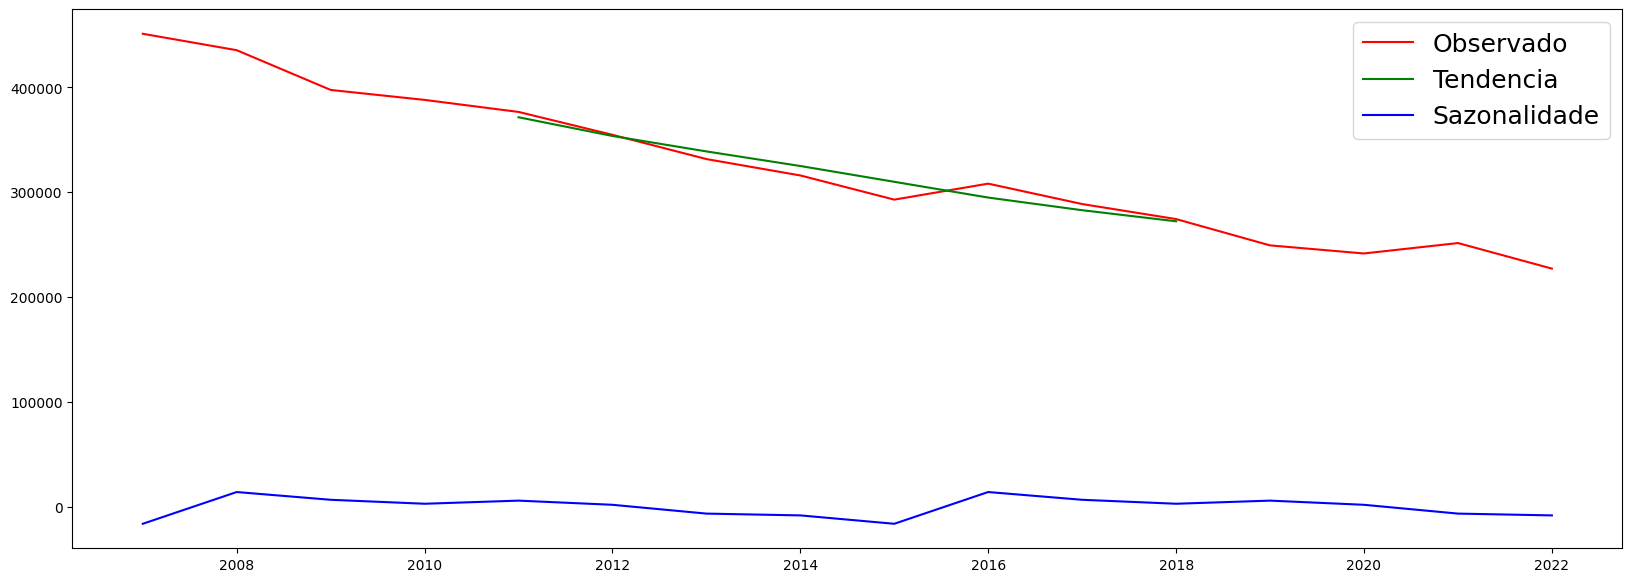

In [33]:
plotar(resultados.observed, resultados.trend, resultados.seasonal, 'red', 'green', 'blue', 'Observado', 'Tendencia', 'Sazonalidade')


In [49]:
y = df_numero_de_matriculas['QT_MAT_BAS']
y.hea

AttributeError: 'Index' object has no attribute 'year'

In [35]:
from statsmodels.tsa.stattools import adfuller

adfuller(y.dropna())

(-2.7835832079294156,
 0.06065732456617298,
 6,
 9,
 {'1%': -4.473135048010974,
  '5%': -3.28988060356653,
  '10%': -2.7723823456790124},
 181.68244104927615)

In [36]:
print(f'p-valor: {adfuller(y.dropna())[1]}')

p-valor: 0.06065732456617298


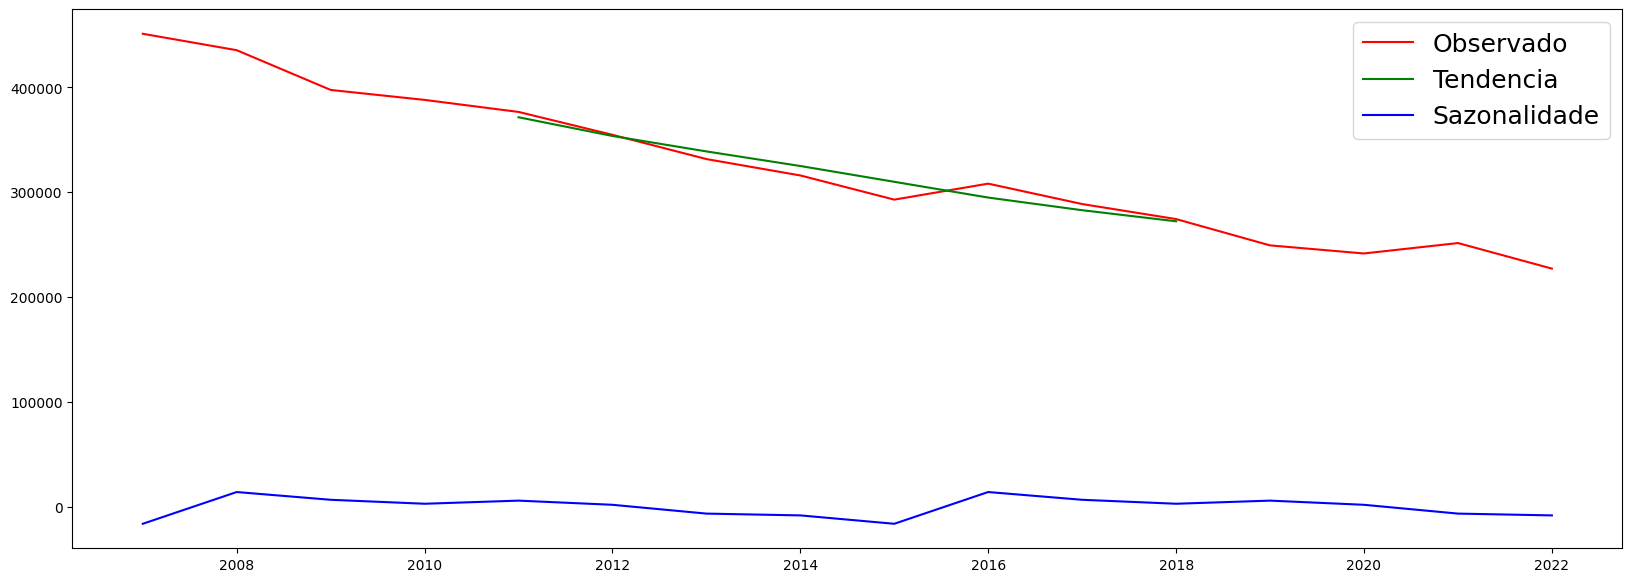

In [37]:
plotar(resultados.observed, resultados.trend, resultados.seasonal, 'red', 'green', 'blue', 'Observado', 'Tendencia', 'Sazonalidade')


In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [39]:
def plotarACF(y1):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(311)
    fig = plot_acf(y1, ax=ax1, title='Original')
    ax2 = fig.add_subplot(312)
    fig = plot_acf(y2, ax=ax2, title='1ª DIFERENCIAÇÃO')
    ax3 = fig.add_subplot(313)
    fig = plot_acf(y3, ax=ax3, title='2ª DIFERENCIAÇÃO')
    

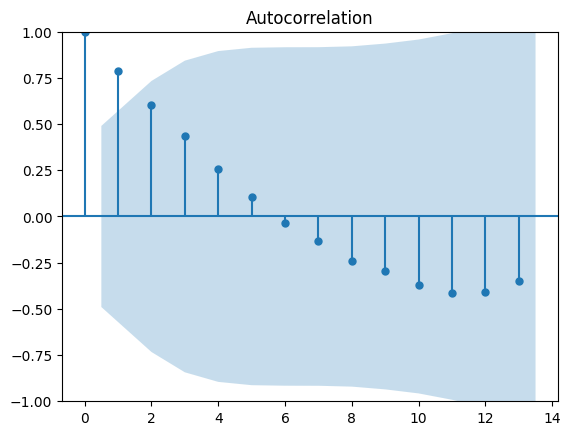

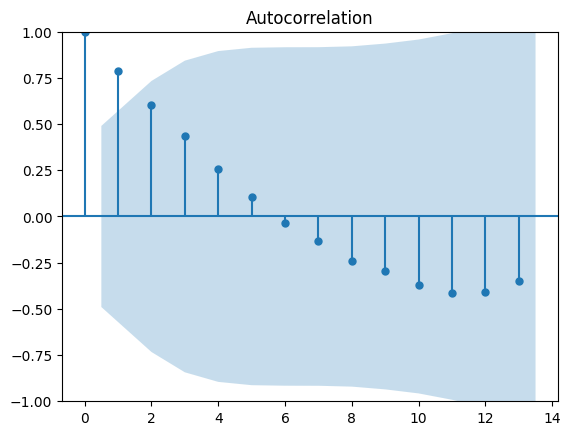

In [40]:
plot_acf(y)

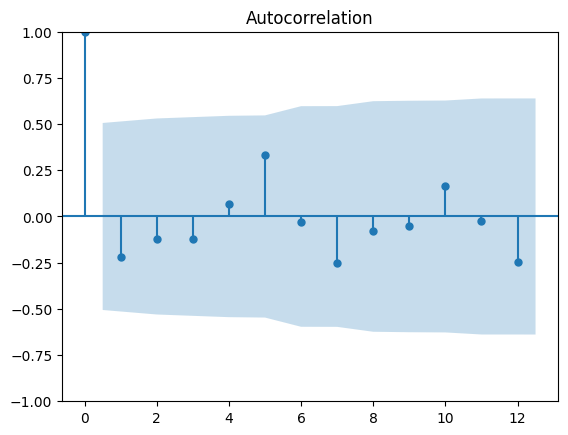

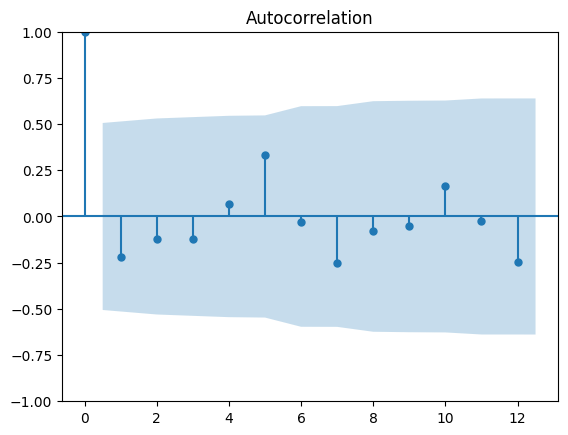

In [41]:

plot_acf(y.diff().dropna())

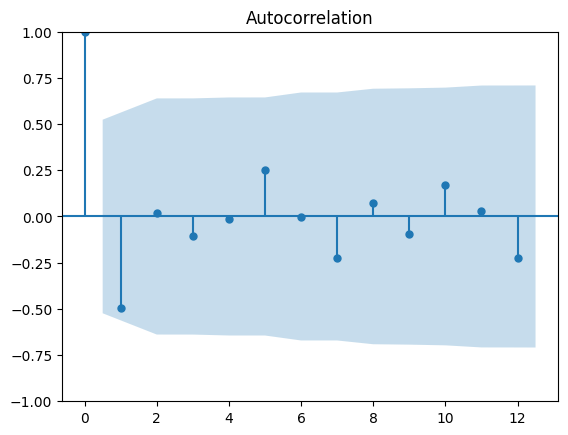

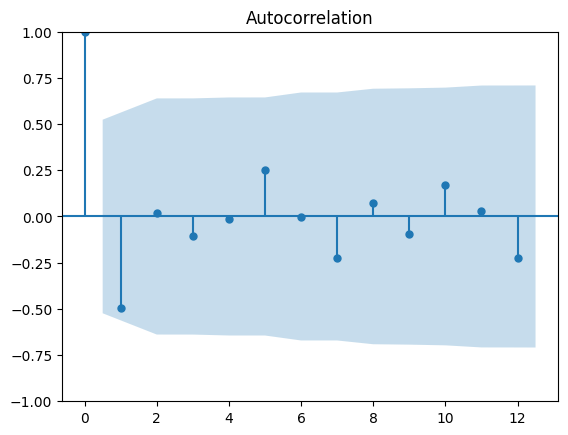

In [42]:
plot_acf(y.diff().diff().dropna())

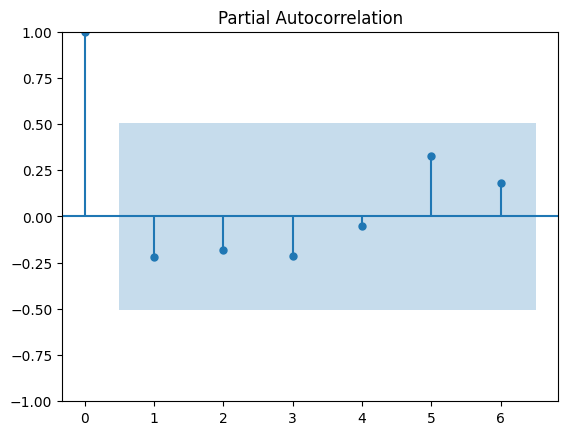

In [44]:
plot_pacf(y.diff().dropna(), lags=6);

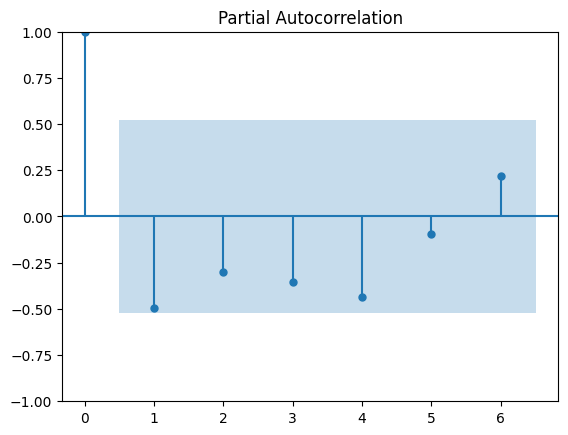

In [45]:
plot_pacf(y.diff().diff().dropna(), lags=6);

In [50]:
from statsmodels.tsa.arima.model import ARIMA
modelo = ARIMA(y, order=(1,1,1))
modelo_fit = modelo.fit()
print(modelo_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             QT_MAT_BAS   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -163.094
Date:                Tue, 05 Dec 2023   AIC                            332.188
Time:                        10:47:49   BIC                            334.312
Sample:                    01-01-2007   HQIC                           332.166
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8857      0.039     22.800      0.000       0.810       0.962
ma.L1         -1.0000      0.532     -1.881      0.060      -2.042       0.042
sigma2      1.567e+08   3.39e-09   4.62e+16      0.0

In [51]:
import itertools

In [52]:
p = d = q = range(0,2)

pdq = list(itertools.product( p, d, q))

In [53]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [54]:
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

In [55]:
print(f'Exemplo de combinacao de parametros para o ARIMA Sazonal - SARIMAX : {pdq[0], seasonal_pdq[0]}')

Exemplo de combinacao de parametros para o ARIMA Sazonal - SARIMAX : ((0, 0, 0), (0, 0, 0, 7))


In [56]:
import statsmodels.api as sm

In [57]:
aic_lista = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX( y, order=param, seasonal_order=param_seasonal)
        results = mod.fit()
        aic_lista.append(f'ARIMA{param}x{param_seasonal} - AIC{results}')

In [58]:

results = mod.fit()

In [63]:
pred = results.get_prediction(start=pd.to_datetime('2007-01-01'), dynamic=False)
pred_ic = pred.conf_int()
pred_ic

,lower QT_MAT_BAS,upper QT_MAT_BAS
2007-01-01,-27821.263145,27821.263145
2008-01-01,447410.126798,502834.815686
2009-01-01,386449.285169,441816.718874
2010-01-01,385898.548246,441223.471752
2011-01-01,345437.717722,400729.377648
2012-01-01,361862.044114,417125.795250
2013-01-01,313180.862166,368419.046017
2014-01-01,671140.138896,725424.733232
2015-01-01,250884.357471,305074.274699
2016-01-01,254989.924028,309179.374189


In [76]:
y[:2]

NU_ANO_CENSO
2007-01-01    451037.0
2008-01-01    435385.0
Name: QT_MAT_BAS, dtype: float64

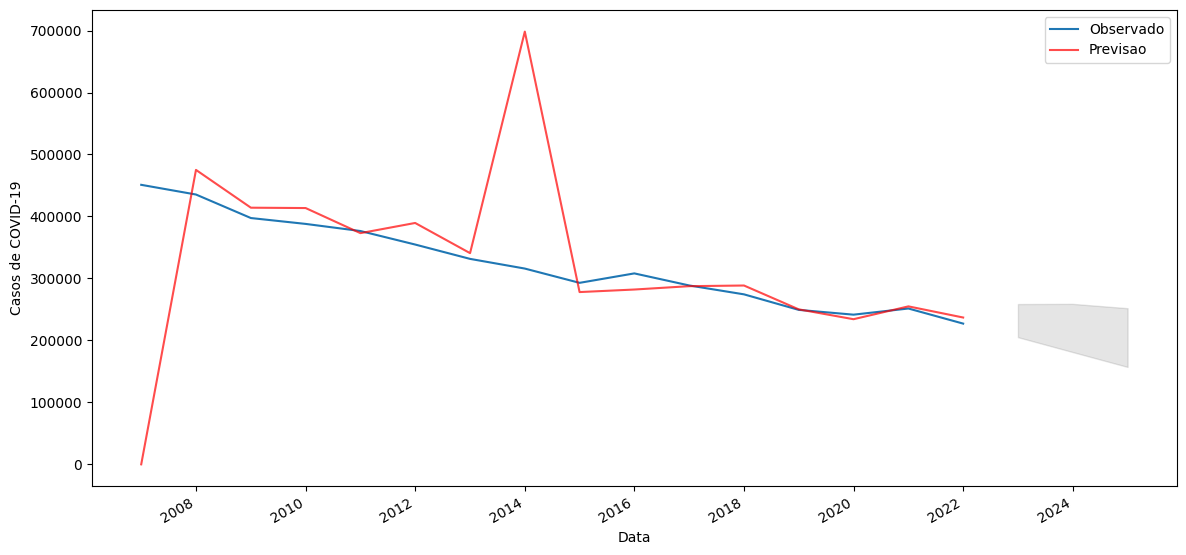

In [78]:
ax = y[:].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Previsao', color='r', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.1)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19')
plt.legend()
plt.show()

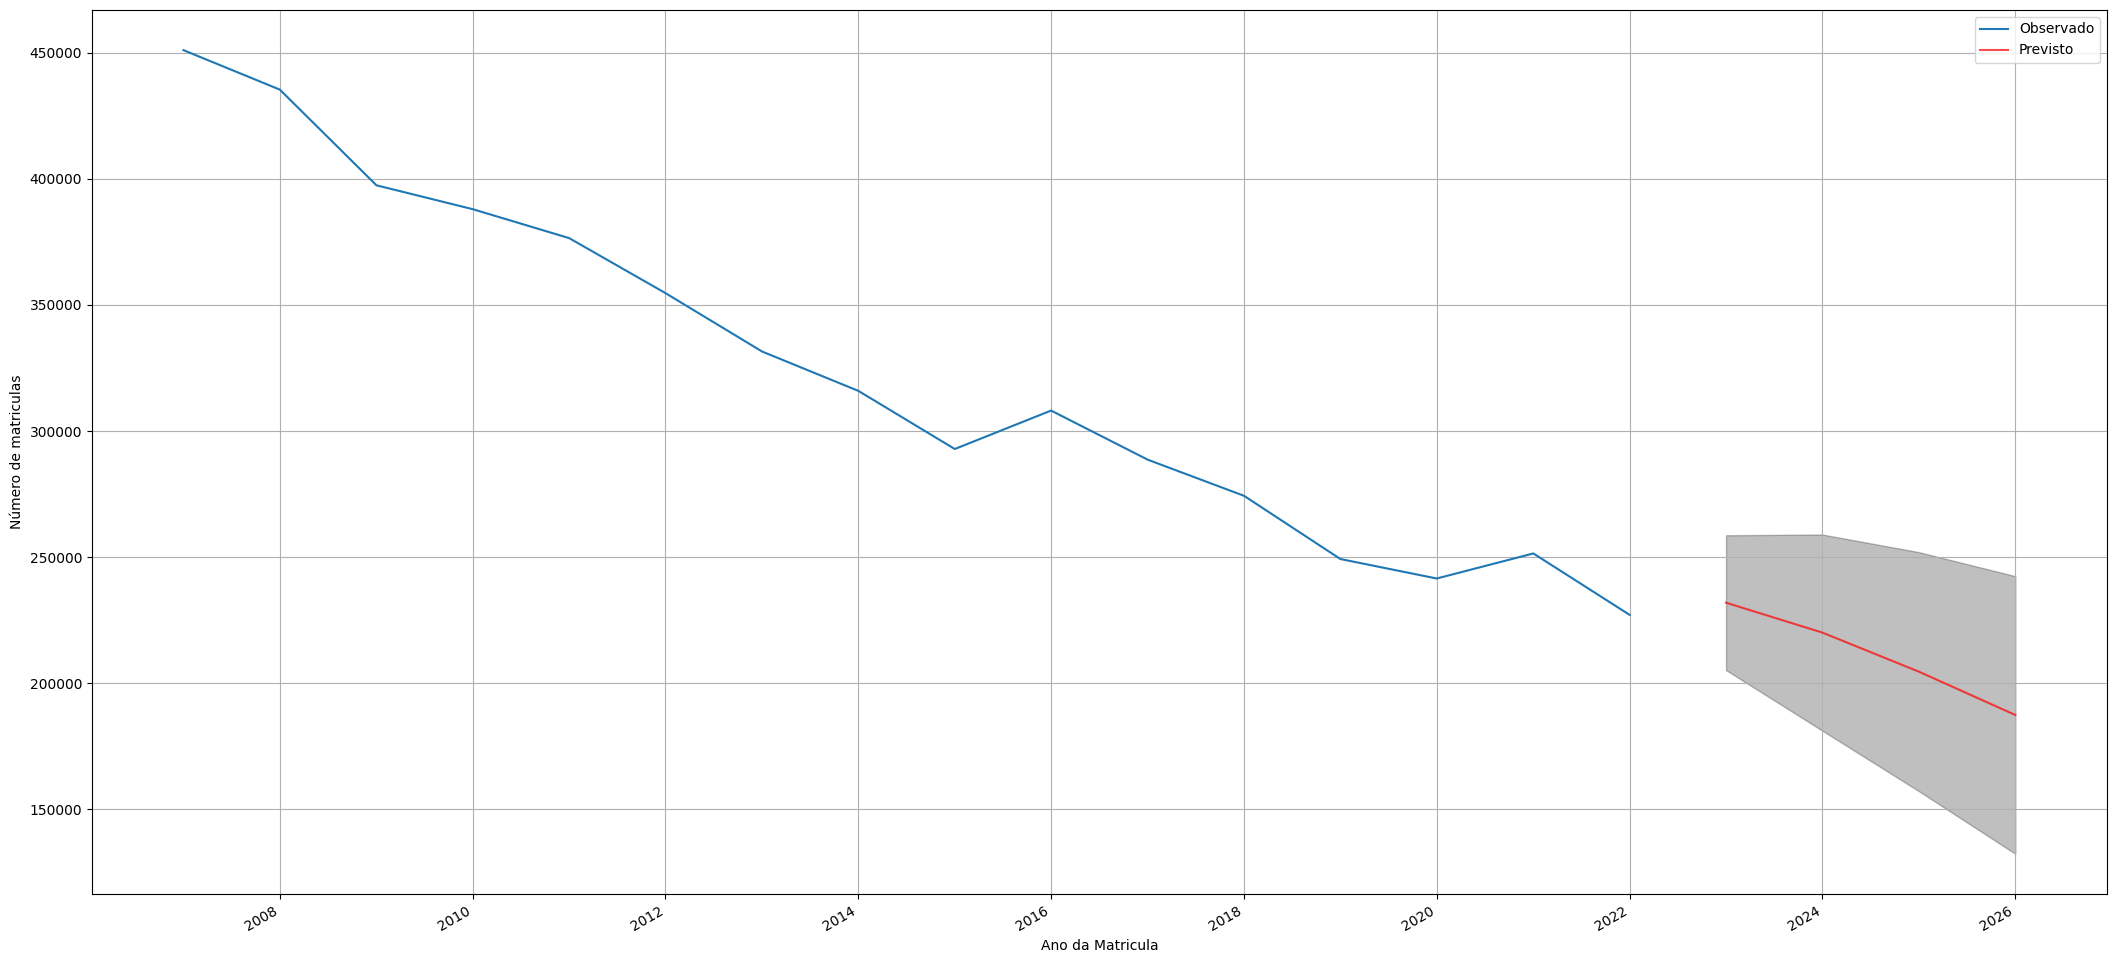

In [89]:

pred_uc = results.get_forecast(steps=4)
pred_ic = pred_uc.conf_int()
ax = y.plot(label='Observado', figsize=(24,12))
pred_uc.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7, figsize=(26,13))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.25)
ax.grid(visible=True)
ax.set_xlabel('Ano da Matricula')
ax.set_ylabel('Número de matriculas')
plt.legend()
plt.show()

In [84]:
y

NU_ANO_CENSO
2007-01-01    451037.0
2008-01-01    435385.0
2009-01-01    397444.0
2010-01-01    387970.0
2011-01-01    376505.0
2012-01-01    354690.0
2013-01-01    331529.0
2014-01-01    315912.0
2015-01-01    292869.0
2016-01-01    308114.0
2017-01-01    288636.0
2018-01-01    274307.0
2019-01-01    249241.0
2020-01-01    241520.0
2021-01-01    251452.0
2022-01-01    227085.0
Name: QT_MAT_BAS, dtype: float64